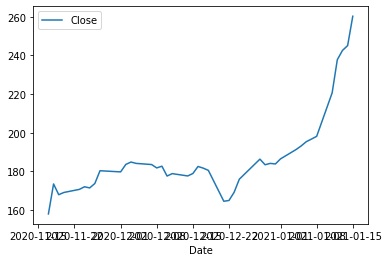

In [11]:
import pandas as pd
import numpy as np
# pip install nsetools;
from nsetools import Nse
nse=Nse()
# q=nse.get_quote('KANSAINER')
# from pprint import pprint
# pprint(q)
# top_gainers = nse.get_top_gainers()
# pip install nsepy;
from nsepy import get_history

from datetime import date
# data = get_history(symbol="SBIN", start=date(2021,1,1), end=date(2021,1,21))

# pip install python-dateutil
import dateutil.relativedelta
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
to_date=datetime.now()
to_date=datetime.strftime(to_date, "%Y %m, %d")
to_date=datetime.strptime(to_date, "%Y %m, %d")
days_to_subtract=60
from_date=to_date-timedelta(days=days_to_subtract)
data = get_history(symbol="TATAMOTORS", start=from_date, end=to_date)
data[['Close']].plot()
data.index = pd.to_datetime(data.index)

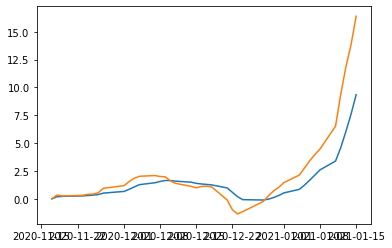

In [12]:
# pip install stockstats

from stockstats import StockDataFrame as Sdf

stock_df = Sdf.retype(data)

data['rsi']=stock_df['rsi_14']

del data['close_-1_s']
del data['close_-1_d']
del data['rs_14']
del data['rsi_14']

data['macd']=stock_df['macd']
data['macdh']=stock_df['macdh']
data['macds']=stock_df['macds']

plt.plot(data['macds'],zorder=1)
plt.plot(data['macd'],zorder=2)

def intersection(lst_1,lst_2):
    intersections = []
    insights = []
    if len(lst_1) > len(lst_2):
        settle = len(lst_2)
    else:
        settle = len(lst_1)
    for i in range(settle-1):
        if (lst_1[i+1] < lst_2[i+1]) != (lst_1[i] < lst_2[i]):
            if ((lst_1[i+1] < lst_2[i+1]),(lst_1[i] < lst_2[i])) == (True,False):
                insights.append('buy')
            else:
                insights.append('sell')
            intersections.append(i)
    return intersections,insights
intersections,insights = intersection(data["macds"],data["macd"])

profit = 0
pat = 1
for i in range(len(intersections)-pat):
    index = intersections[i]
    true_trade= None
    if data['close'][index] < data['close'][index+pat]:
        true_trade = 'buy'
    elif data['close'][index] > data['close'][index+pat]:
        true_trade = 'sell'
    if true_trade != None:
        if insights[i] == true_trade:
            profit += abs(data['close'][index]-data['close'][index+1]) 
        if insights[i] != true_trade:
            profit += -abs(data['close'][index]-data['close'][index+1])


In [16]:
# function to check last signal
def tradingApp(from_date,to_date,company):
    data = get_history(symbol=company, start=from_date, end=to_date)
    data.index = pd.to_datetime(data.index)
    stock_df = Sdf.retype(data)
    data['macd']=stock_df['macd']
    data['macdh']=stock_df['macdh']
    data['macds']=stock_df['macds']
    intersections,insights = intersection(data["macds"],data["macd"])
    print(company,insights[-1])

(DatetimeIndex(['2020-11-17', '2020-12-09', '2020-12-28'], dtype='datetime64[ns]', name='Date', freq=None),
 ['buy', 'sell', 'buy'])

In [104]:
def checkTopGainersAndLosers(from_date,to_date):
    nse=Nse()
    
    print("-------------top losers------------")
    top_losers = nse.get_top_losers()
    df = pd.DataFrame(top_losers)
    for i in df['symbol']:
        tradingApp(from_date,to_date,i)
    print("-------------top gainers------------")
    top_gainers = nse.get_top_gainers()
    df = pd.DataFrame(top_gainers)
    for i in df['symbol']:
        tradingApp(from_date,to_date,i)
    

In [106]:
checkTopGainersAndLosers(date(2020,1,1),date(2021,1,14))

-------------top losers------------
TECHM buy
HCLTECH buy
WIPRO buy
GAIL buy
ONGC buy
HINDALCO buy
ASIANPAINT sell
BPCL buy
ULTRACEMCO buy
DIVISLAB sell
-------------top gainers------------
TATAMOTORS buy
BHARTIARTL buy
UPL buy
ITC sell
GRASIM buy
BAJAJ-AUTO buy
TATASTEEL buy


In [102]:
def getAllStocks():
    nse=Nse()
    all_stock_codes = nse.get_stock_codes()
    all_stock_codes.pop('SYMBOL')
    for i in all_stock_codes.keys():
        print (i)